In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mushrooms.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [3]:
print(df['cap-shape'].unique())
print(df['cap-surface'].unique())
print(df['cap-color'].unique())
print(df['bruises'].unique())
print(df['stalk-shape'].unique())

['x' 'b' 's' 'f' 'k' 'c']
['s' 'y' 'f' 'g']
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
['t' 'f']
['e' 't']


In [4]:
pd.get_dummies(df)

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [5]:
poisonous_list = df.loc[df['class'] == 'p', 'odor'].value_counts().index
edible_list = df.loc[df['class'] == 'e', 'odor'].value_counts().index
print(list(set(poisonous_list).intersection(edible_list)))
print(df.loc[df['odor'] == 'n', 'class'].value_counts())

['n']
e    3408
p     120
Name: class, dtype: int64


Uzywajac kolumny `odor` jestesmy w stanie ze skutecznością 98-99% okreslić grzyb jako trujacy. Jest to spowodowane, tym że tylko grzyby nie posiadające zapachu (cecha `n`) są w tym zbiorze jadalne.

# JEŚLI GRZYB MA ZAPACH NIE JEDZ GO!

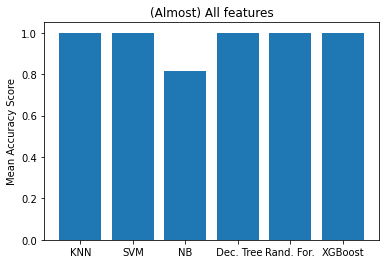

In [6]:
scoreall = [1.0, 1.0, 0.814621409921671, 1.0, 1.0, 1.0]
barsall = ('KNN', 'SVM', 'NB', ' Dec. Tree', 'Rand. For.','XGBoost')
y_pos = np.arange(len(barsall))

fig, ax = plt.subplots()    
plt.bar(y_pos, scoreall)
plt.xticks(y_pos, barsall)
plt.ylabel('Mean Accuracy Score')
plt.title('(Almost) All features')
plt.show()

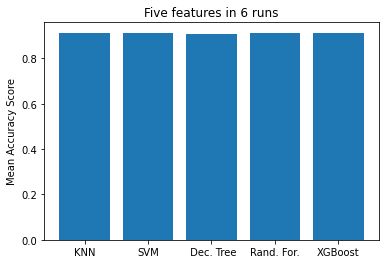

In [7]:
score = [0.9110406564714659,0.9125948029342285,0.9097351734427453, 0.9109784906129553, 0.9135272908118862]

# accur = [0.9110406564714659]
bars = ('KNN', 'SVM', ' Dec. Tree','Rand. For.', 'XGBoost')
y_pos = np.arange(len(bars))

fig, ax = plt.subplots()    
plt.bar(y_pos, score)
plt.xticks(y_pos, bars)
plt.ylabel('Mean Accuracy Score')
plt.title('Five features in 6 runs')
plt.show()


In [8]:
print(' 0.9135','XGBoost\n',
      '0.9126','SVM\n',
      '0.9110', 'KNN\n',
      '0.9110','Random Forest\n',
      '0.9097', 'Decision Tree\n')

 0.9135 XGBoost
 0.9126 SVM
 0.9110 KNN
 0.9110 Random Forest
 0.9097 Decision Tree

